<a href="https://colab.research.google.com/github/Vinoth1512/ML-ASSIGNMENTS/blob/main/ASSIGNMENT3(LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [ ]:
%matplotlib inline

In [ ]:
data=pd.read_csv("HR_comma_sep.csv")

In [ ]:
df=pd.DataFrame(data)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
dummy=pd.get_dummies(df.salary)
df1=pd.concat([df,dummy],axis=1)
final=df1.drop(['salary','Department'],axis=1)
final.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0


In [ ]:
x=final.drop('left',axis=1)
y=final['left']

In [ ]:
x.shape

(14999, 10)

In [ ]:
y.shape

(14999,)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state=20)

In [ ]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

/home/vinoth/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred=model.predict(xtest)
ypred


array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
ytest

6493     0
3568     0
972      1
3260     0
671      1
        ..
8523     0
14129    0
13295    0
9485     0
7769     0
Name: left, Length: 5000, dtype: int64

In [ ]:
confusion_matrix(ytest,ypred)

array([[3536,  282],
       [ 745,  437]])

In [ ]:
accuracy_score(ytest,ypred)

0.7946

No handles with labels found to put in legend.


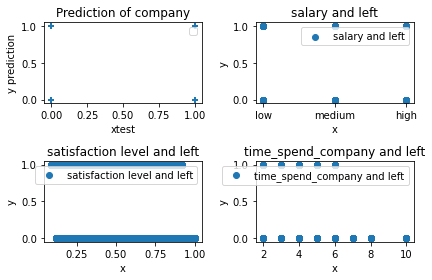

In [ ]:
plt.subplot(2,2,1)
plt.scatter(ytest, ypred, marker = '+')
plt.xlabel('xtest')
plt.ylabel('y prediction')
plt.legend(loc='best')
plt.title('Prediction of company')
plt.subplot(2,2,2)
plt.scatter(x=df['salary'], y=df['left'],label='salary and left')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.title('salary and left')
plt.subplot(2,2,3)
plt.scatter(x=df['satisfaction_level'], y=df['left'],label='satisfaction level and left')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.title('satisfaction level and left')
plt.subplot(2,2,4)
plt.scatter(x=df['time_spend_company'], y=df['left'],label='time_spend_company and left')
plt.xlabel('x')
plt.ylabel('y')
plt.title('time_spend_company and left')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

/home/vinoth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


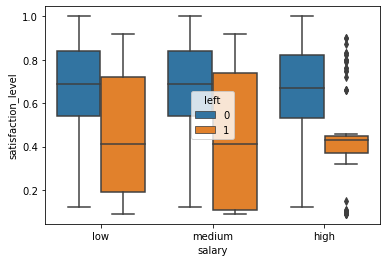

In [ ]:
sns.boxplot(df['salary'],df['satisfaction_level'],hue=df['left'])
plt.show()